[0 0 2 1 0 2 2 0 1 0 1 1 2 2 0 2 0 0 1 2 1 1 2 0 2 2 0 1 0 1 1 1 2 1 1 0 1
 0 2 0 0 0 0 2 2 0 2 0 0 0 0 1 0 2 1 1 0 2 0 1 0 0 2 1 1 0 2 1 2 0 0 0 0 0
 2 0 0 2 0 0]
[[5.96216216 2.77027027]
 [4.74761905 3.02857143]
 [5.34090909 3.63181818]]


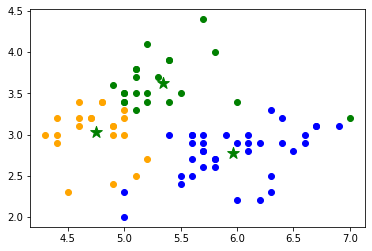

[0 0 0 1 2 2 2 0 2 2 2 1 0 2 0 2 0 0 1 2]


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from qlearnkit.algorithms import QKMeans
from qiskit import BasicAer
from qiskit.utils import QuantumInstance, algorithm_globals
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

seed = 42
algorithm_globals.random_seed = seed

quantum_instance = QuantumInstance(BasicAer.get_backend('qasm_simulator'),
                                   shots=1024,
                                   optimization_level=1,
                                   seed_simulator=seed,
                                   seed_transpiler=seed)

# Use iris data set for training and test data
X, y = load_iris(return_X_y=True)

num_features = 2
X = np.asarray([x[0:num_features] for x, y_ in zip(X, y) if y_ != 2])
y = np.asarray([y_ for x, y_ in zip(X, y) if y_ != 2])

qkmeans = QKMeans(n_clusters=3,
                  quantum_instance=quantum_instance
)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=seed)
qkmeans.fit(X_train)

print(qkmeans.labels_)
print(qkmeans.cluster_centers_)

# Plot the results
colors = ['blue', 'orange', 'green']
for i in range(X_train.shape[0]):
    plt.scatter(X_train[i, 0], X_train[i, 1], color=colors[qkmeans.labels_[i]])
plt.scatter(qkmeans.cluster_centers_[:, 0], qkmeans.cluster_centers_[:, 1], marker='*', c='g', s=150)
plt.show()

# Predict new points
prediction = qkmeans.predict(X_test)
print(prediction)

In [2]:
import numpy as np
from qlearnkit.algorithms import QKNeighborsClassifier
from qlearnkit.encodings import AmplitudeEncoding
from qiskit import BasicAer
from qiskit.utils import QuantumInstance, algorithm_globals
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

seed = 42
algorithm_globals.random_seed = seed

quantum_instance = QuantumInstance(BasicAer.get_backend('qasm_simulator'),
                                   shots=1024,
                                   optimization_level=1,
                                   seed_simulator=seed,
                                   seed_transpiler=seed)

encoding_map = AmplitudeEncoding()

# Use iris data set for training and test data
X, y = load_iris(return_X_y=True)

num_features = 2
X = np.asarray([x[0:num_features] for x, y_ in zip(X, y) if y_ != 2])
y = np.asarray([y_ for x, y_ in zip(X, y) if y_ != 2])

qknn = QKNeighborsClassifier(
    n_neighbors=3,
    quantum_instance=quantum_instance,
    encoding_map=encoding_map
)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=seed)
qknn.fit(X_train, y_train)

print(f"Testing accuracy: "
      f"{qknn.score(X_test, y_test):0.2f}")

Testing accuracy: 1.00


In [3]:
import numpy as np
from qlearnkit.algorithms import QSVClassifier
from qiskit import BasicAer
from qiskit.utils import QuantumInstance, algorithm_globals
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from qiskit.circuit.library import ZZFeatureMap

seed = 42
algorithm_globals.random_seed = seed

quantum_instance = QuantumInstance(BasicAer.get_backend('statevector_simulator'),
                                   shots=1024,
                                   optimization_level=1,
                                   seed_simulator=seed,
                                   seed_transpiler=seed)

# Use iris data set for training and test data
X, y = load_iris(return_X_y=True)

num_features = 2
X = np.asarray([x[0:num_features] for x, y_ in zip(X, y) if y_ != 2])
y = np.asarray([y_ for x, y_ in zip(X, y) if y_ != 2])

encoding_map = ZZFeatureMap(2)

qsvc = QSVClassifier(
    encoding_map=encoding_map,
    quantum_instance=quantum_instance
)

# use iris dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=seed)
qsvc.fit(X_train, y_train)

print(f"Testing accuracy: "
      f"{qsvc.score(X_test, y_test):0.2f}")

Testing accuracy: 0.95
